In [ ]:
# %%

import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 

In [ ]:
# %%

#dataset loading
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data() 

60000
10000
(28, 28)


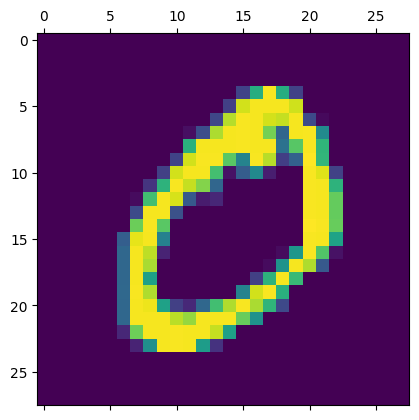

In [ ]:
# %%

print(len(x_train))
print(len(x_test) )
print(x_train[0].shape )
plt.matshow(x_train[1]) 

In [ ]:
# %%

# Normalizing the dataset 
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order 
# to compute for model building 
x_train_flatten = x_train.reshape(len(x_train), 28*28) 
x_test_flatten = x_test.reshape(len(x_test), 28*28) 

In [ ]:
# %%

#simple neural network for reference
model = keras.Sequential([ 
	keras.layers.Dense(10, input_shape=(784,), 
					activation='sigmoid') 
]) 
model.compile( 
	optimizer='adam', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']) 

model.fit(x_train_flatten, y_train, epochs=5) 

model.evaluate(x_test_flatten, y_test) 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1110 - loss: 2.3018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1147 - loss: 2.3000
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1120 - loss: 2.2998
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1133 - loss: 2.2986
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1104 - loss: 2.2982
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1160 - loss: 2.2972


[2.2972495555877686, 0.11349999904632568]

In [ ]:
# %%

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# LeNet-5 model implementation in Keras
def lenet5():
    model = models.Sequential()
    
    # C1: Convolutional Layer (6 filters, 5x5 kernel)
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1), padding='same'))
    
    # S2: Average Pooling Layer (2x2)
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    
    # C3: Convolutional Layer (16 filters, 5x5 kernel)
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'))
    
    # S4: Average Pooling Layer (2x2)
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    
    # C5: Convolutional Layer (120 filters, 5x5 kernel)
    model.add(layers.Conv2D(120, kernel_size=(5, 5), activation='tanh'))
    
    # Flatten the output from the convolutional layers
    model.add(layers.Flatten())
    
    # F6: Fully Connected Layer (84 neurons)
    model.add(layers.Dense(84, activation='tanh'))
    
    # Output Layer: Fully Connected Layer (10 neurons for digit classification)
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Add padding to convert 28x28 images to 32x32
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), 'constant')  # Padding 2 pixels on all sides
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), 'constant')

# Reshape to add the channel dimension (for grayscale images)
x_train = x_train.reshape(-1, 32, 32, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 32, 32, 1).astype('float32') / 255

# Instantiate and compile the model
lenet_model = lenet5()
lenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
lenet_model.summary()

# Train the model
lenet_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
lenet_model.evaluate(x_test, y_test)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        40,404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,946 (359.16 KB)

 Trainable params: 91,946 (359.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8765 - loss: 0.4114 - val_accuracy: 0.9583 - val_loss: 0.1416
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9647 - loss: 0.1148 - val_accuracy: 0.9710 - val_loss: 0.0970
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0750 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9834 - loss: 0.0526 - val_accuracy: 0.9787 - val_loss: 0.0709
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9809 - val_loss: 0.0664
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0309 - val_accuracy: 0.9818 - val_loss: 0.0651
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 0.9804 - val_loss: 0.0695
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9933 - loss: 0.0219 - 

[0.04889561980962753, 0.9847999811172485]